Import R into python

In [117]:
import rpy2 
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


Import the libraries 

In [118]:
%%R
library(tidyverse)
library(ggthemes)

In [119]:
%%R

df20 <- read_delim('../results/combined/all.csv', delim=',') %>% group_by(genus,species) %>% mutate(recomb_bin = ntile(cm_per_mb, 20))
pg_namedf <- read_delim('../data/genus_phylogenetic_group_metadata.txt', delim='\t')


Rows: 5257244 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): chr, species, genus
dbl (13): start, end, freq_mean, freq_min, freq_max, freq_median, window_siz...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 57 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): genus_name, pg_name

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [120]:
%%R
df20

# A tibble: 5,257,244 × 17
# Groups:   genus, species [195]
   chr     start    end freq_mean freq_min freq_max freq_median window_size_mean
   <chr>   <dbl>  <dbl>     <dbl>    <dbl>    <dbl>       <dbl>            <dbl>
 1 chr1  1700001 1.80e6     0.395    0.395    0.395       0.395            99999
 2 chr1  1800001 1.9 e6     0.677    0.677    0.677       0.677            99999
 3 chr1  1900001 2   e6     0.571    0.571    0.571       0.571            99999
 4 chr1  2100001 2.20e6     0.671    0.671    0.671       0.671            99999
 5 chr1  2200001 2.3 e6     0.727    0.727    0.727       0.727            99999
 6 chr1  2400001 2.5 e6     0.748    0.748    0.748       0.748            99999
 7 chr1  2500001 2.6 e6     0.755    0.755    0.755       0.755            99999
 8 chr1  2600001 2.70e6     0.296    0.296    0.296       0.296            99999
 9 chr1  2700001 2.8 e6     0.180    0.180    0.180       0.180            99999
10 chr1  2800001 2.90e6     0.685    0.685    0.6

In [121]:
%%R
merge_pg_name <- left_join(df20,pg_namedf, by = c('genus'='genus_name'))

In [122]:
%%R
merge_pg_name$pg_name <- as_factor(merge_pg_name$pg_name)

In [123]:
%%R
merge_pg_name

# A tibble: 5,257,244 × 18
# Groups:   genus, species [195]
   chr     start    end freq_mean freq_min freq_max freq_median window_size_mean
   <chr>   <dbl>  <dbl>     <dbl>    <dbl>    <dbl>       <dbl>            <dbl>
 1 chr1  1700001 1.80e6     0.395    0.395    0.395       0.395            99999
 2 chr1  1800001 1.9 e6     0.677    0.677    0.677       0.677            99999
 3 chr1  1900001 2   e6     0.571    0.571    0.571       0.571            99999
 4 chr1  2100001 2.20e6     0.671    0.671    0.671       0.671            99999
 5 chr1  2200001 2.3 e6     0.727    0.727    0.727       0.727            99999
 6 chr1  2400001 2.5 e6     0.748    0.748    0.748       0.748            99999
 7 chr1  2500001 2.6 e6     0.755    0.755    0.755       0.755            99999
 8 chr1  2600001 2.70e6     0.296    0.296    0.296       0.296            99999
 9 chr1  2700001 2.8 e6     0.180    0.180    0.180       0.180            99999
10 chr1  2800001 2.90e6     0.685    0.685    0.6

%%R
highest_five <- df20 %>% filter(!(chr=='chrX')) %>% 
    filter(freq_mean > 0.7) %>%
    group_by(genus,species,recomb_bin) %>% 
    reframe(
        freq_mean = mean(freq_mean),
        mean_pi = mean(PI)*freq_mean,
        max = max(mean_pi)) %>% filter(recomb_bin==20) %>% select(genus, species, max)
write_csv(highest_five, '../results/pi_in_five_percent.csv')

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


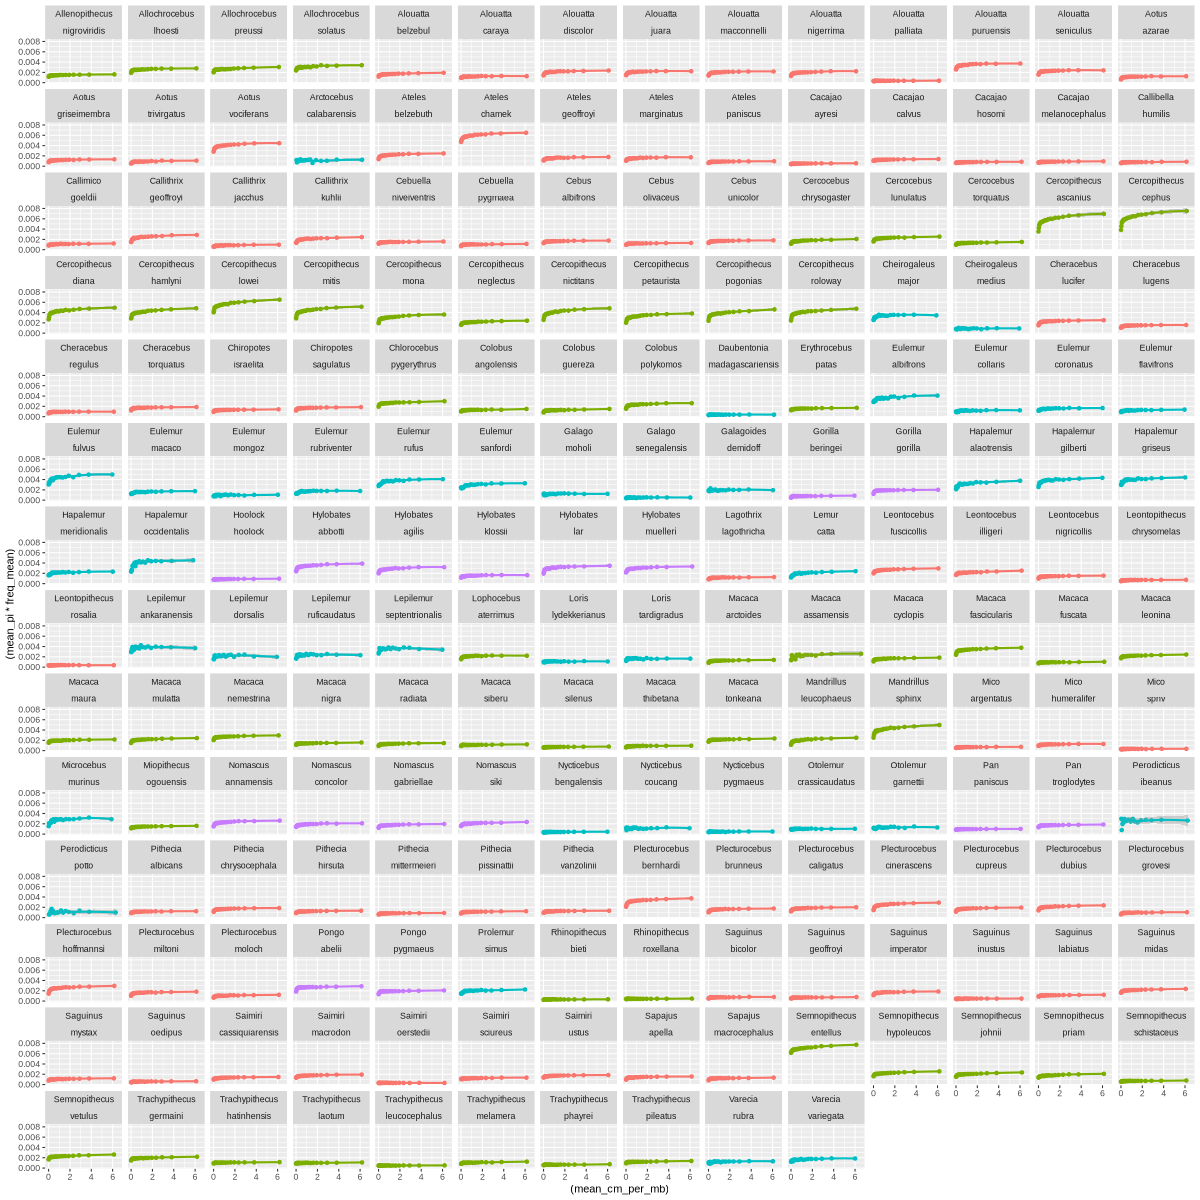

In [124]:
%%R -h 1200 -w 1200
merge_pg_name %>% filter(!(chr=='chrX')) %>% 
    filter(freq_mean > 0.7) %>%
    filter(!(species %in% c('zaza','albinasus'))) %>%
    group_by(pg_name,genus,species,recomb_bin) %>% 
    reframe(
        mean_pi = mean(PI),
        freq_mean = mean(freq_mean),
        mean_cm_per_mb = mean(cm_per_mb),
        max = max(mean_pi)) %>% 
        ggplot(aes(x=(mean_cm_per_mb),y=(mean_pi*freq_mean), col = pg_name))+
           geom_point()+
           geom_smooth()+
           facet_wrap(genus~species)+
            theme(legend.position = 'none')

Trying to put all the slopes into one big graph (DOESNT work yet

%%R -h 1200 -w 1200
test <- df %>% filter(!(chr=='chrX')) %>% 
  filter(freq_mean > 0.7) %>% 
filter(!(species %in% c('zaza','albinasus'))) %>%
  group_by(species,recomb_bin) %>% 
  summarise(
    mean_pi = mean(PI),
    freq_mean = mean(freq_mean),
    mean_cm_per_mb = mean(cm_per_mb),
      proxy_ne = max(mean_pi)
  ) %>% ungroup()

test %>%
  ggplot(aes(x = log10(mean_cm_per_mb), y = (mean_pi*freq_mean)/proxy_ne, alpha = 0.5))+
  geom_smooth(se = F, method = 'lm',aes(group=species, col = proxy_ne))+
  theme_minimal()+
scale_colour_viridis_c()+
NULL

Generating the ''mikkel slope'' and plotting it as a function of max pi, which at least under equal generation time and mutation rate is proportional to effective population time

In [125]:
%%R

diff_df <- merge_pg_name %>%
   filter(!(chr=='chrX')) %>% 
  filter(freq_mean > 0.7) %>% 
  group_by(pg_name,genus,species,recomb_bin) %>% 
  reframe(
    freq_mean = mean(freq_mean),
    mean_pi = mean(PI)*freq_mean,
    mean_cm_per_mb = mean(cm_per_mb)) %>% 
   ungroup() %>% 
   group_by(pg_name,genus,species) %>%
    filter(recomb_bin %in% c(1,20)) %>%
   reframe(
     min = min(mean_pi),
     max = max(mean_pi),
     slope_mikkel = (max-min)/max,
     average_pi = mean(mean_pi),
     diff = max-min
   )
diff_df

# A tibble: 194 × 8
   pg_name         genus species     min     max slope_mikkel average_pi    diff
   <fct>           <chr> <chr>     <dbl>   <dbl>        <dbl>      <dbl>   <dbl>
 1 New_world_monk… Alou… belzeb… 1.19e-3 1.92e-3        0.381   0.00156  7.32e-4
 2 New_world_monk… Alou… caraya  9.48e-4 1.26e-3        0.249   0.00110  3.14e-4
 3 New_world_monk… Alou… discol… 1.41e-3 2.36e-3        0.402   0.00188  9.48e-4
 4 New_world_monk… Alou… juara   1.45e-3 2.23e-3        0.351   0.00184  7.81e-4
 5 New_world_monk… Alou… maccon… 1.38e-3 2.18e-3        0.366   0.00178  7.98e-4
 6 New_world_monk… Alou… nigerr… 1.29e-3 2.22e-3        0.419   0.00175  9.29e-4
 7 New_world_monk… Alou… pallia… 3.07e-4 3.99e-4        0.230   0.000353 9.18e-5
 8 New_world_monk… Alou… puruen… 2.58e-3 3.73e-3        0.308   0.00315  1.15e-3
 9 New_world_monk… Alou… senicu… 1.57e-3 2.40e-3        0.344   0.00198  8.24e-4
10 New_world_monk… Aotus azarae  6.35e-4 1.25e-3        0.492   0.000942 6.16e-4
# ℹ 184 

`geom_smooth()` using formula = 'y ~ x'


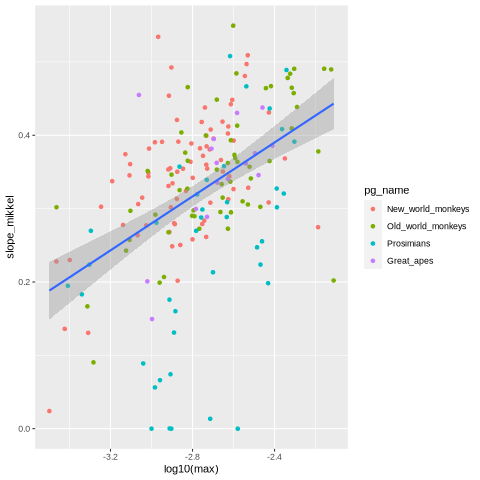

In [126]:
%%R

diff_df  %>%
filter(!(species %in% c('zaza','albinasus'))) %>%
   ggplot(aes(x=log10(max),y=slope_mikkel))+
   geom_point(aes(col=pg_name))+
   geom_smooth(method = 'lm')#+theme(legend.position='none')


A TRY to characterize the speed at which pi is recovered as recombination rate increases. Doesnt work at the moment, the idea was to se how much recombination was needed to recover 90% of the diversity 

%%R
#a dataframe with bins of 1% of the data
df_ninty_pi <- read_delim('../results/combined/all.csv', delim=',') %>% group_by(species) %>% mutate(recomb_bin = ntile(cm_per_mb, 100))

%%R

test <- df_ninty_pi %>%
    filter(freq_mean > 0.7) %>%
    group_by(species,recomb_bin) %>%
    filter(!(species %in% c('zaza','albinasus')))%>%
    reframe(
        mean_pi = mean(PI*freq_mean),
        cm_per_mb = mean(cm_per_mb)
        ) %>%
    ungroup() %>%
    group_by(species)%>%
    mutate(
        max = max(mean_pi),
        ninety = max*0.9,
        diff = ninety-mean_pi) %>% 
    ungroup()
        

%%R -h 1500 -w 1500
        
test %>%
 ggplot(aes(x=(cm_per_mb),y=(mean_pi), col = max))+
           geom_point()+
           geom_smooth(method = 'lm')+
           facet_wrap(species~.)+
            theme(legend.position = 'none')+
            scale_colour_viridis_c()


Make a correlation matrix of all species and the correlation between recombination rate and diversity: ...

In [127]:
%%R
nes <- read_delim('../results/model/Nested_model/Ne_Pi_recomb.csv', delim = ',') %>% select('genus','species','NE_MEAN','NE_VARIANCE','NE_MEDIAN')



New names:
• `` -> `...1`
Rows: 5071829 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): genus, species, FAMILY, chr
dbl (21): ...1, Unnamed: 0, MEAN, MEDIAN, VARIANCE, NE_MEAN, NE_MEDIAN, NE_V...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [128]:
%%R
merged_tibble <- left_join(nes,diff_df, by = c('species' = 'species', 'genus'='genus'))

`geom_smooth()` using formula = 'y ~ x'


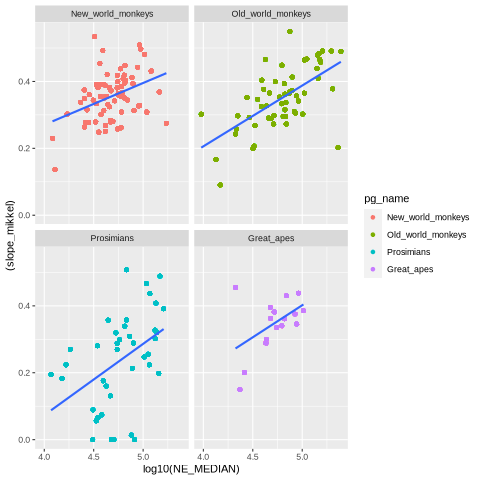

In [130]:
%%R 
merged_tibble %>% 
    filter(!(species %in% c('zaza','albinasus'))) %>%
   ggplot(aes(x=log10(NE_MEDIAN),y=(slope_mikkel)))+
   geom_point(aes(col=pg_name))+
   #geom_errorbar(aes(xmin = log10(lower_bound), xmax = log10(upper_bound)), width = 0.005) +
   geom_smooth(method = 'lm',se=F)+#+theme(legend.position='none')
    facet_wrap(pg_name~.)

In [130]:
%%R
model <- lm(data=merged_tibble,NE_MEDIAN~ slope_mikkel)

In [131]:
%%R
anova(model)

Analysis of Variance Table

Response: NE_MEDIAN
             Df     Sum Sq    Mean Sq F value  Pr(>F)  
slope_mikkel  1 1.2913e+10 1.2913e+10  4.5071 0.03627 *
Residuals    98 2.8077e+11 2.8650e+09                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
